Start by loading the MNIST digits data set.  Although not required, we can take a look at the image arrays using matplotlib.

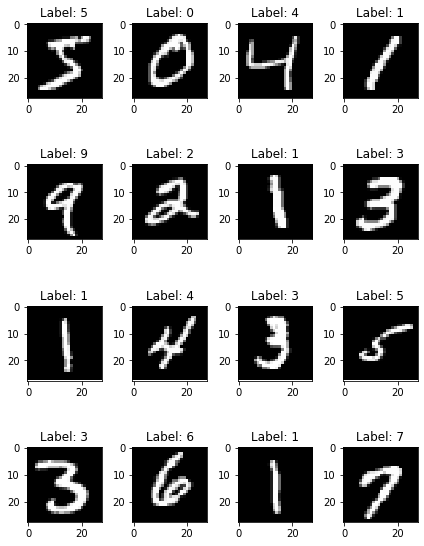

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_images, train_labels), _ = mnist.load_data()

num_row = 4
num_col = 4
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

Now reshape out data and add another feature of either noise or blank cells to our original data set.  The author was not clear, but we are adding another feature to each image when concatenating our synthetic data, not creating new training examples.  The idea is that we have two images per label, one with useful (the original) data, and one image that means nothing.

In [44]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

train_images_with_noise_channels = np.concatenate(
  [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

Define our model and train on our training images with noise and training images with blank images data sets.

In [45]:
def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = get_model()
hist_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
hist_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.6005 - accuracy: 0.8136 - val_loss: 0.3032 - val_accuracy: 0.9105
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2464 - accuracy: 0.9237 - val_loss: 0.2332 - val_accuracy: 0.9291
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1638 - accuracy: 0.9495 - val_loss: 0.1500 - val_accuracy: 0.9572
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1160 - accuracy: 0.9640 - val_loss: 0.2037 - val_accuracy: 0.9362
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0851 - accuracy: 0.9730 - val_loss: 0.1305 - val_accuracy: 0.9619
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0640 - accuracy: 0.9794 - val_loss: 0.1259 - val_accuracy: 0.9631
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.1599 - val_accuracy: 0.9588

Now plot out accuracies for each model.

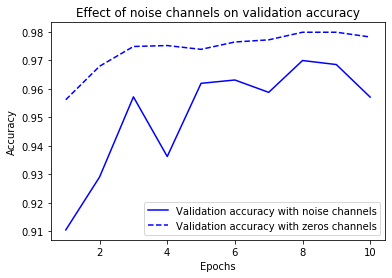

In [46]:
val_acc_noise = hist_noise.history['val_accuracy']
val_acc_zeros = hist_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-',
         label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--',
         label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Overall both models performed well, but training set with blank images performed better than our data containing noise.  The idea behind this is that neural networks will sometimes try to fit the network to meaningless noise that seems important to the training data, but does not generalize to the training 